In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="image/transformer_position_encoding.png" align="left" width=600/>

## How Transformer Position Encoding simulates Binary Bit togging


The ```0/1``` togging frequency gets lower as the index in the embedding vector increases. This simulates the togging frequecy in the higher bits of the binary number expression.

<img src="image/transformer_position_encoding_intuition.png" aign="left" width=600/>

In [2]:
B = base = 10000
D = d_model = 512
T = sequence_length = 512
dim_indices = np.arange(0, 512)

In [3]:
def get_denominator(index: int, d_model: int = D, base: int = B):
    """
    Args:
        index: dimension index (0 ... D-1)
        d_model: embedding dimensions
        base: denominator base
    """
    return np.power(base, 2 * index / d_model)

## Denominator of the position parameter

* The frequency ```ω``` decrease as ```d``` (dimensional position in ```D``` dimensional vector) increases.

$$\frac {1}{C ^{ \frac {2d} {D} }}$$



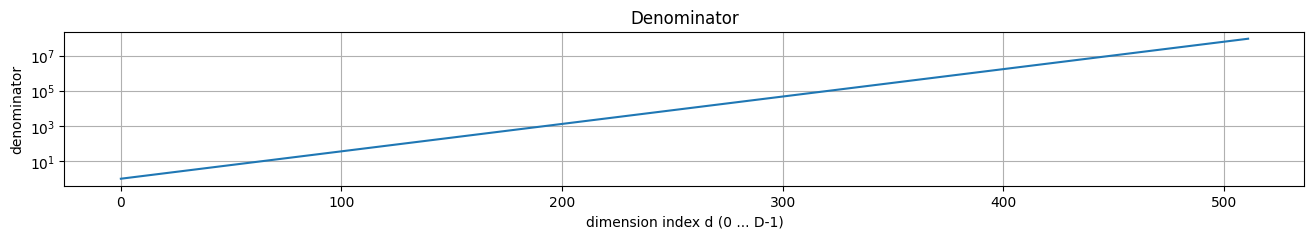

In [4]:
plt.figure(figsize=(16, 2))
plt.xlabel("dimension index d (0 ... D-1)")
plt.ylabel("denominator")
plt.plot(get_denominator(index=dim_indices), label="denominator (log scale)")
plt.title("Denominator")
plt.yscale("log")
plt.grid()

In [5]:
plt.figure(figsize=(16, 2))
plt.plot(x, 1/denominator(x), label="denominator")
plt.grid()

NameError: name 'x' is not defined

<Figure size 1600x200 with 0 Axes>

# Position Encodings

In [ ]:
plt.figure(figsize=(16, 3))
for pos in range(0, 2, 1):
    plt.plot(np.sin(pos/get_denominator(dim_indices)), label=f"dimension {pos}")

plt.grid()
plt.legend(loc = "upper right")    

In [ ]:
plt.figure(figsize=(16, 3))
for pos in range(0, 2):
    plt.plot(np.cos(pos/get_denominator(dim_indices)), label=f"dimension {pos}")

plt.grid()
plt.legend(loc = "upper right")    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def encode_position(position: int, d_model: int = D, base: int = B):
    encodings = np.zeros((d_model,))    # Embeddings of a position (D,)
    # Even indices
    indices = np.arange(0, d_model, 2)
    encodings[indices] = np.sin(position / get_denominator(index=indices, d_model=d_model, base=base)) 

    # Odd indices
    indices = np.arange(1, d_model, 2)
    encodings[indices] = np.cos(position / get_denominator(index=indices, d_model=d_model, base=base)) 

    return encodings

def get_positon_encodings(length: int = T, d_model: int = D, base: int = B):
    """
    Args:
        length: sqeuqnce_length
        d_model: embedding dimensions
        base: denominator base        
    """
    positions = np.array([
        encode_position(position=position, d_model=d_model, base=base)
        for position in range(length)    
    ])
    return positions


In [ ]:
positions = range(0, 3)

plt.figure(figsize=(16, 10))
for pos in positions:
    plt.plot(encode_position(pos, d_model=D, base=B), label=f"position {pos}")
plt.xlim(0, 8)
plt.grid()
plt.legend()

In [ ]:
position_encodings = get_positon_encodings(length=T, d_model=D, base=B)

In [ ]:
plt.figure(figsize=(20, 3))
cax = plt.matshow(position_encodings)
plt.gcf().colorbar(cax)

$$ω = \frac {1}{C ^{ \frac {2p} {D} }}$$